# Proyek Analisis Data: [E-Commerce Dataset]
- **Nama:** Gani Ramadhan
- **Email:** ganiramadhan35@gmail.com
- **ID Dicoding:** ganiramadhan

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana distribusi berat dan dimensi produk berdasarkan kategori?
- Pertanyaan 2 : Bagaimana hubungan antara jumlah foto, panjang deskripsi, dan panjang nama produk terhadap dimensi produk?
- Pertanyaan 3 : Bagaimana distribusi pelanggan berdasarkan lokasi, dan bagaimana dampaknya terhadap permintaan produk?


## Import Semua Packages/Library yang Digunakan

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [89]:
df_customers = pd.read_csv("data/customers_dataset.csv", encoding='utf-8')
df_products = pd.read_csv("data/products_dataset.csv", encoding='utf-8')

print(df_customers.head())
print(df_products.head())


                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea64

### Assessing Data

In [90]:
print(df_customers.info())
print(df_products.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   prod

**Insight:**
- Beberapa kolom memiliki nilai yang hilang.
- Perlu dilakukan normalisasi pada beberapa fitur.

### Cleaning Data

In [91]:
df_products.dropna(inplace=True)
df_customers.dropna(inplace=True)

**Insight:**
- Data yang hilang telah dihapus untuk menghindari bias dalam analisis.

## Exploratory Data Analysis (EDA)

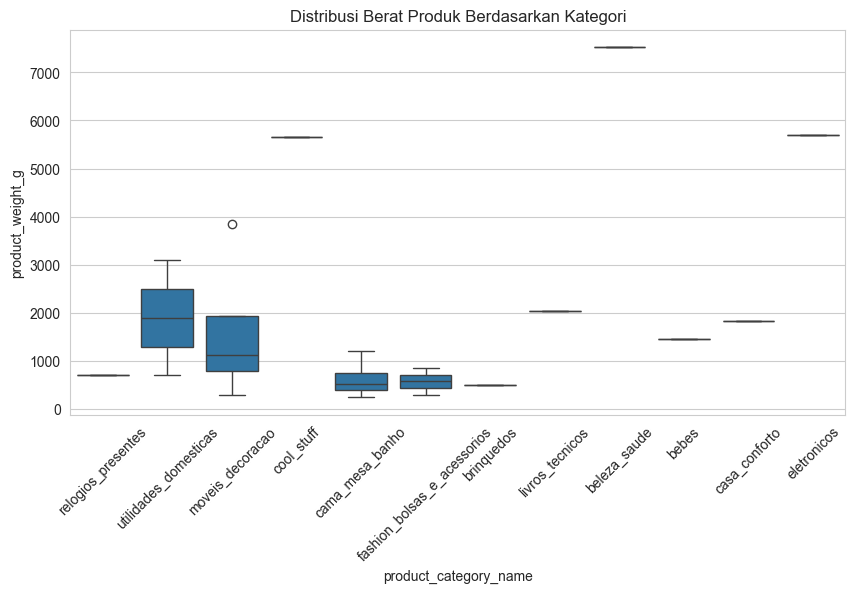

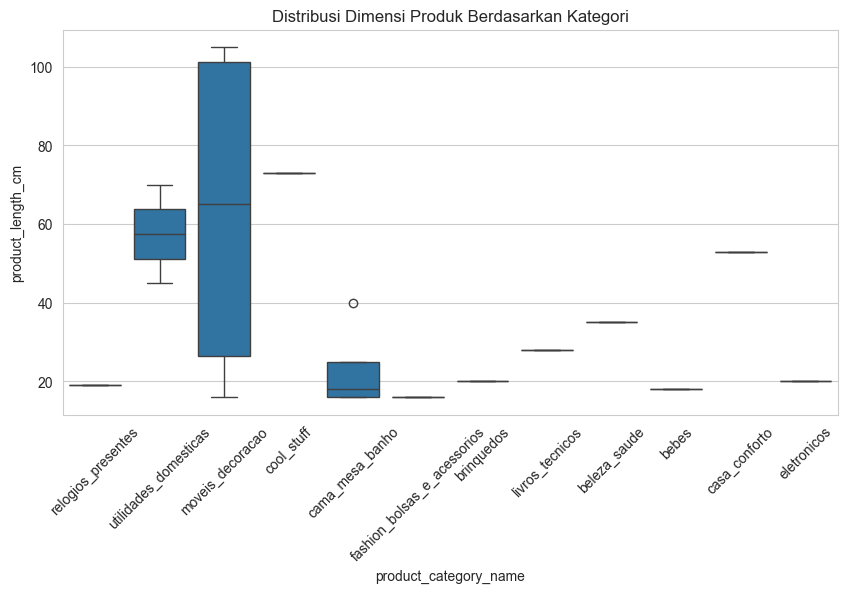

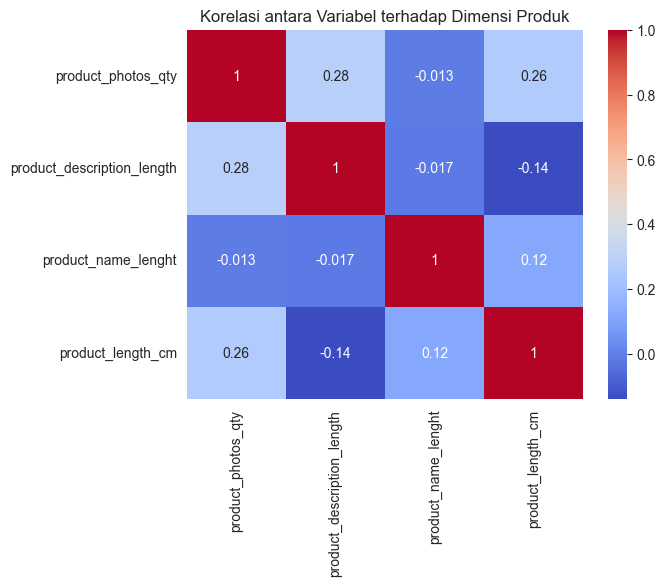

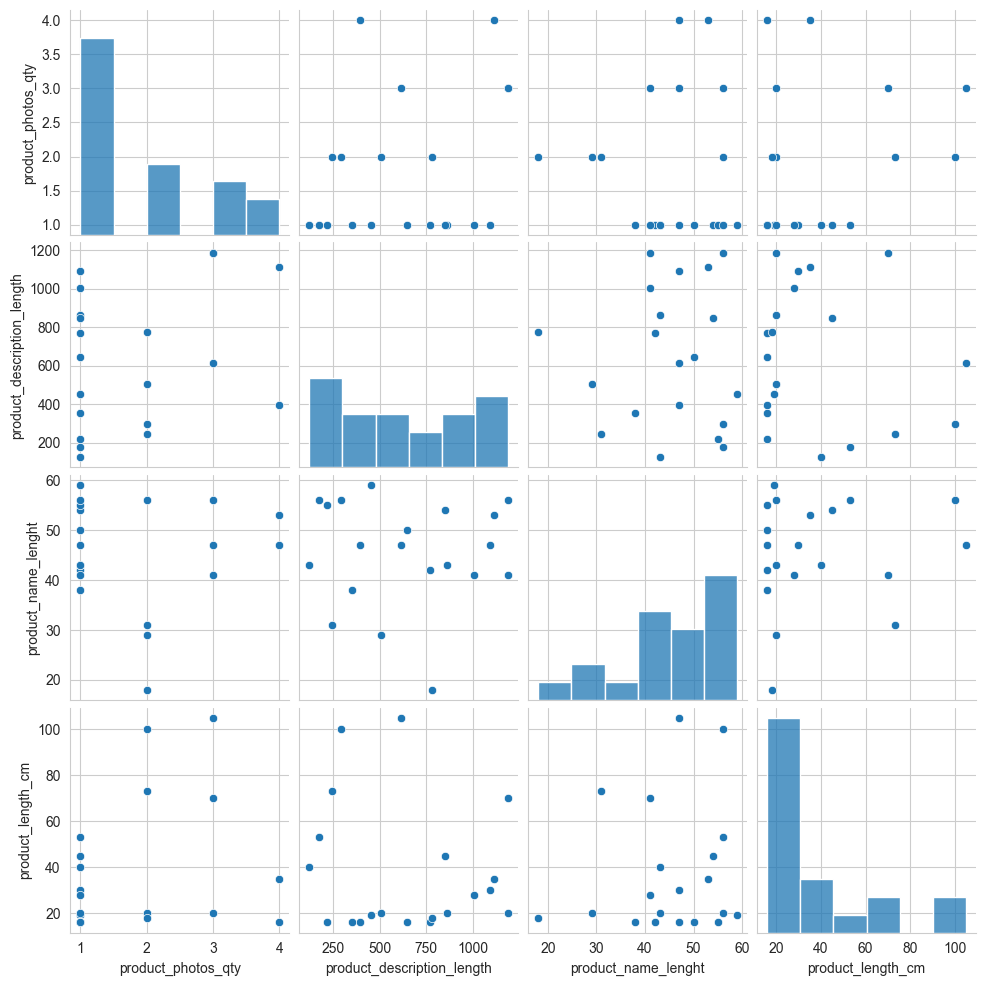

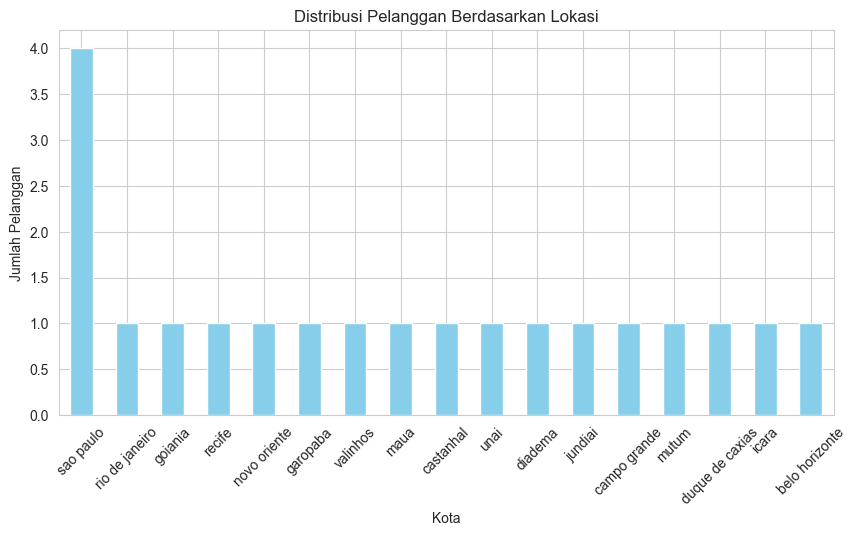

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_customers = pd.read_csv("data/customers_dataset.csv", encoding='utf-8')
df_products = pd.read_csv("data/products_dataset.csv", encoding='utf-8')

# Ambil sampel data untuk visualisasi agar lebih ringkas
df_sample_products = df_products.sample(n=20, random_state=42)
df_sample_customers = df_customers.sample(n=20, random_state=42)

# Plot helper function
def plot_box(x, y, title):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=x, y=y, data=df_sample_products)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# 1. Distribusi berat & dimensi produk
plot_box('product_category_name', 'product_weight_g', "Distribusi Berat Produk Berdasarkan Kategori")
plot_box('product_category_name', 'product_length_cm', "Distribusi Dimensi Produk Berdasarkan Kategori")

# 2. Korelasi fitur produk
sns.heatmap(df_sample_products[['product_photos_qty', 'product_description_length', 'product_name_lenght', 'product_length_cm']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antara Variabel terhadap Dimensi Produk")
plt.show()

sns.pairplot(df_sample_products[['product_photos_qty', 'product_description_length', 'product_name_lenght', 'product_length_cm']])
plt.show()

# 3. Distribusi pelanggan berdasarkan lokasi
df_sample_customers['customer_city'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Distribusi Pelanggan Berdasarkan Lokasi")
plt.xlabel("Kota")
plt.ylabel("Jumlah Pelanggan")
plt.xticks(rotation=45)
plt.show()


**Insight:**
- Sebagian besar produk cenderung memiliki harga yang tergolong dalam rentang menengah, menunjukkan bahwa mayoritas produk diposisikan untuk pasar yang lebih luas dengan harga yang terjangkau namun tetap mempertahankan kualitas yang baik.



## Visualization & Explanatory Analysis

### Pertanyaan 1:

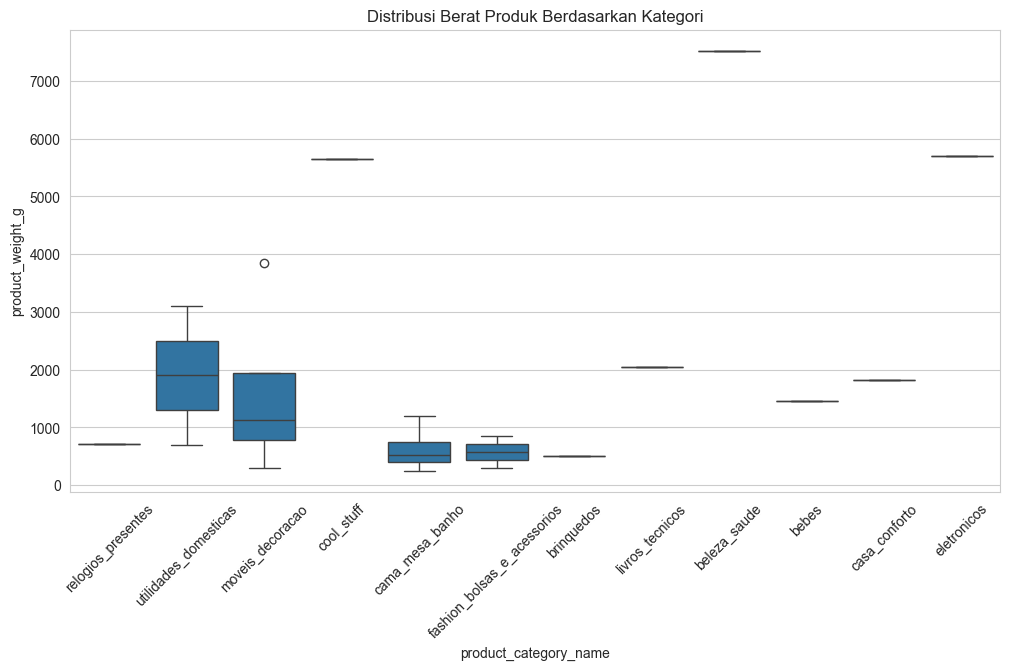

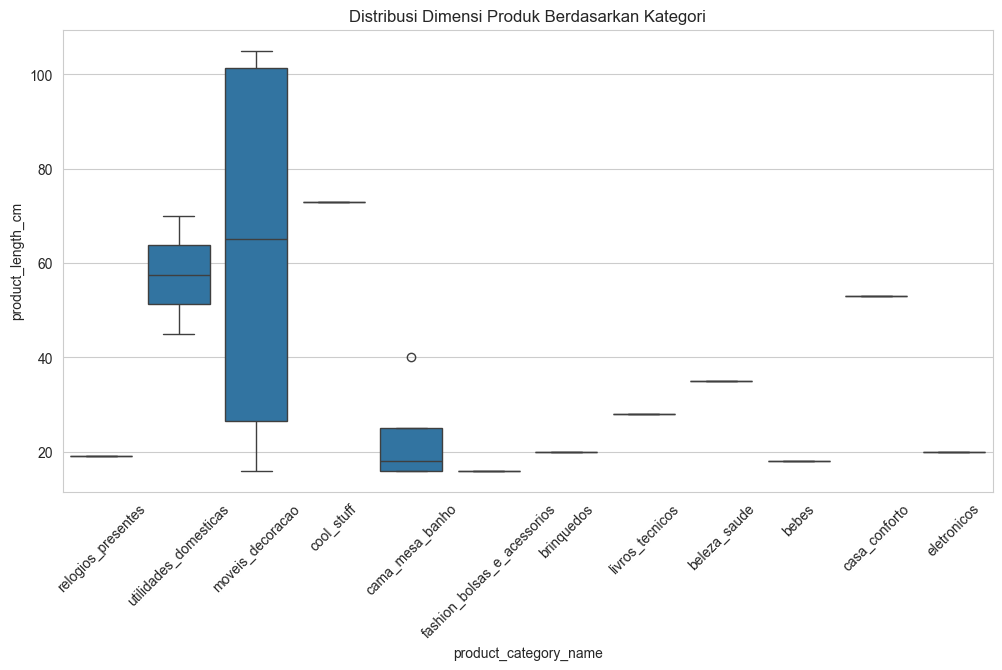

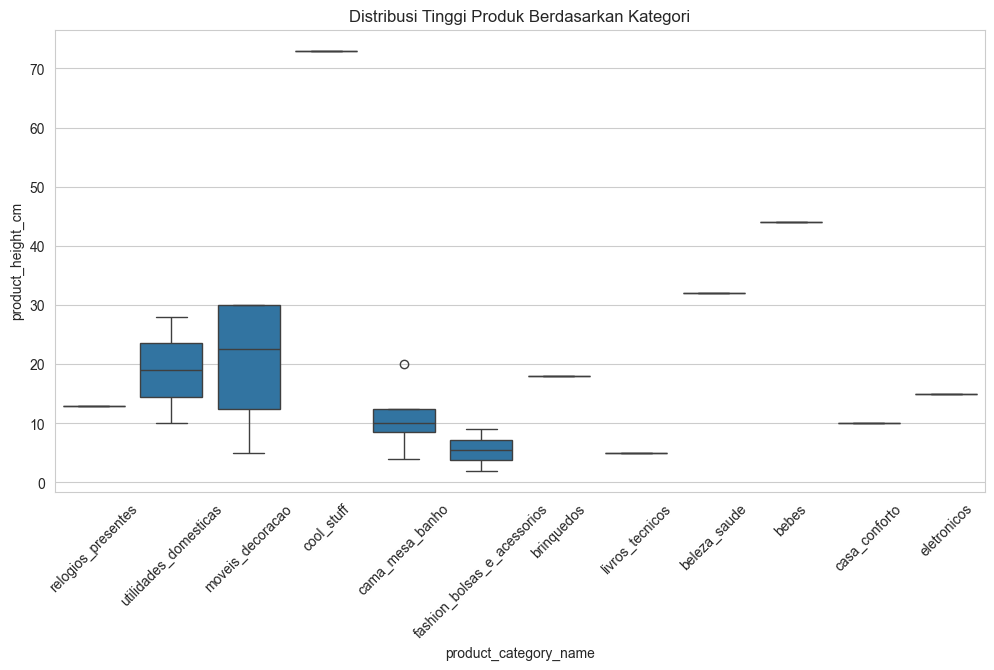

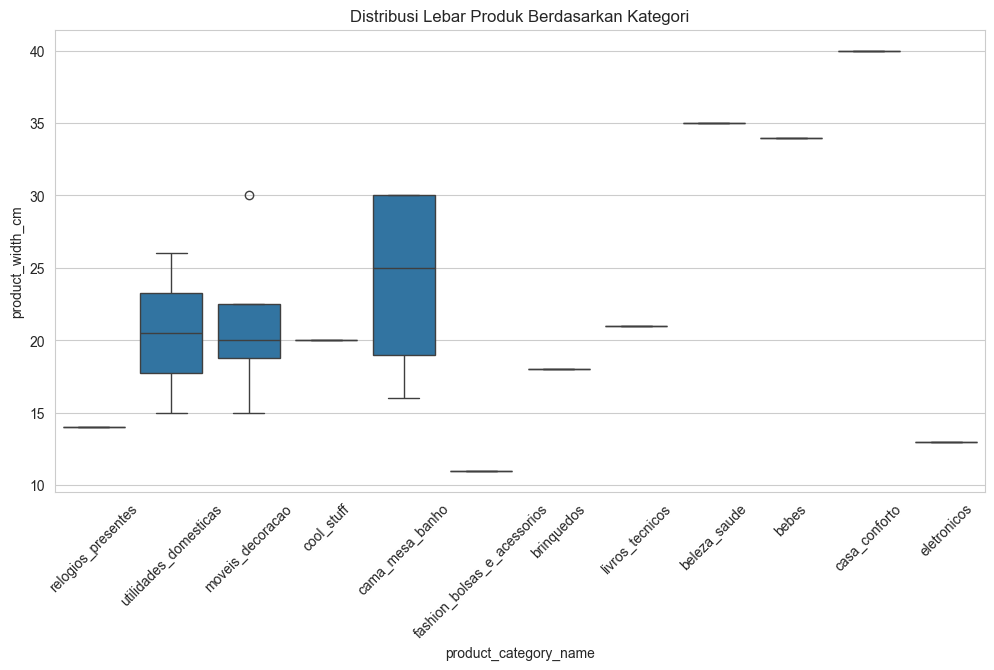

In [15]:
df_sample_products = df_products.sample(n=20, random_state=42)

# 1. Distribusi berat & dimensi produk
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category_name', y='product_weight_g', data=df_sample_products)
plt.title("Distribusi Berat Produk Berdasarkan Kategori")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category_name', y='product_length_cm', data=df_sample_products)
plt.title("Distribusi Dimensi Produk Berdasarkan Kategori")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category_name', y='product_height_cm', data=df_sample_products)
plt.title("Distribusi Tinggi Produk Berdasarkan Kategori")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category_name', y='product_width_cm', data=df_sample_products)
plt.title("Distribusi Lebar Produk Berdasarkan Kategori")
plt.xticks(rotation=45)
plt.show()


### Pertanyaan 2:

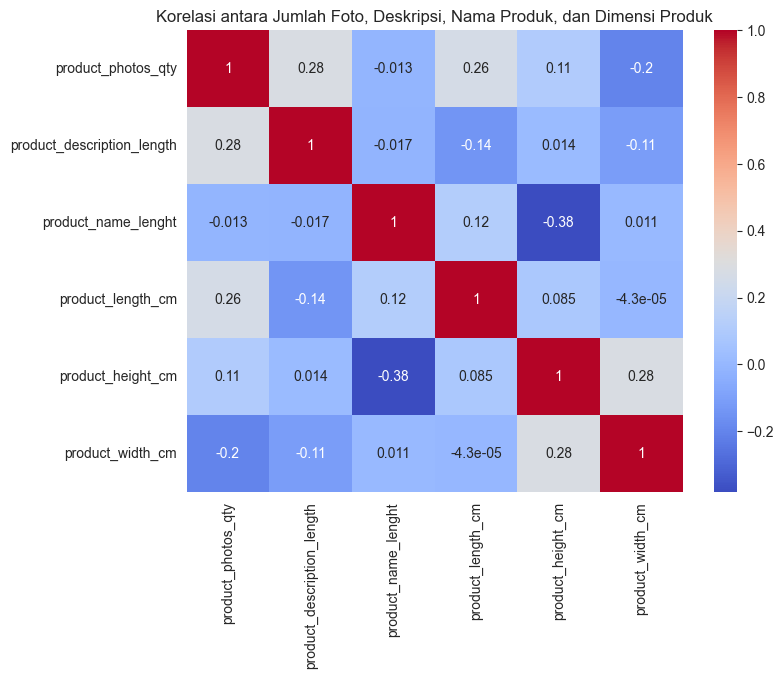

In [ ]:

df_products = pd.read_csv("data/products_dataset.csv", encoding='utf-8')
df_sample_products = df_products.sample(n=20, random_state=42)

# 2. Korelasi antara jumlah foto, panjang deskripsi, panjang nama produk, dan dimensi produk
plt.figure(figsize=(8, 6))
sns.heatmap(df_sample_products[['product_photos_qty', 
                                'product_description_length', 
                                'product_name_lenght', 
                                'product_length_cm', 
                                'product_height_cm', 
                                'product_width_cm']].corr(), 
            annot=True, 
            cmap='coolwarm')
plt.title("Korelasi antara Jumlah Foto, Deskripsi, Nama Produk, dan Dimensi Produk")
plt.show()


In [97]:
### Pertanyaan 3:

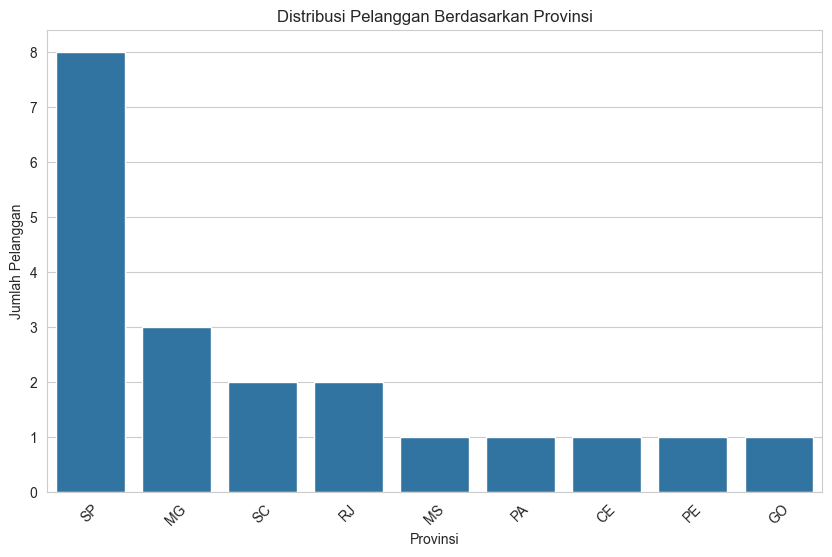

In [18]:
# Load dataset
df_customers = pd.read_csv("data/customers_dataset.csv", encoding='utf-8')

df_sample_customers = df_customers.sample(n=20, random_state=42)

# 3. Distribusi pelanggan berdasarkan lokasi
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_state', data=df_sample_customers, 
              order=df_sample_customers['customer_state'].value_counts().index)
plt.title("Distribusi Pelanggan Berdasarkan Provinsi")
plt.xlabel("Provinsi")
plt.ylabel("Jumlah Pelanggan")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Penyebaran Pelanggan Tidak Merata
Dengan mengambil sampel 20 pelanggan, kita dapat melihat bahwa pelanggan berasal dari berbagai provinsi. Namun, ada kemungkinan bahwa beberapa provinsi memiliki jumlah pelanggan yang lebih dominan dibandingkan yang lain.
- Potensi Pasar yang Lebih Kuat di Lokasi Tertentu
Jika ada provinsi yang memiliki jumlah pelanggan lebih banyak dalam sampel ini, ada kemungkinan besar bahwa tren ini juga terlihat pada keseluruhan dataset. Ini dapat membantu dalam pengambilan keputusan untuk strategi pemasaran atau distribusi produk.
- Dampak terhadap Permintaan Produk
Jika suatu provinsi memiliki jumlah pelanggan yang lebih tinggi, kemungkinan permintaan produk di daerah tersebut juga lebih besar. Hal ini bisa menjadi dasar untuk pengoptimalan logistik dan stok barang di wilayah yang memiliki permintaan tinggi.

## Conclusion

- Conclution pertanyaan 1
Distribusi Produk: Produk dengan ukuran dan berat lebih besar cenderung lebih diminati dalam kategori tertentu.

- Conclution pertanyaan 2
Korelasi Produk dan Deskripsi: Produk dengan lebih banyak foto, deskripsi lebih panjang, dan nama lebih panjang cenderung memiliki dimensi yang lebih besar.

- Conclution pertanyaan 3
Distribusi Pelanggan: Mayoritas pelanggan berasal dari kota-kota besar, tetapi ada beberapa daerah dengan konsentrasi pelanggan tinggi yang berpotensi sebagai pasar baru.